<div id="container" style="position:relative;">
<div style="float:left"><h1> Capstone Project: Diabetes risk predictor based on health indicators</h1></div>
<div style="float:left"><h2> Notebook 3: # Pre-processing - Created by Diego Villanueva</h2></div>
</div>
</div>

## Table of contents

3. Pre-processing

    3.1 Imports and Data Loading

    3.2 Data Dictionary

    3.3 Target variable modifications

    3.4 Feature columns modifications

    3.5 Remainder/test split

    3.6 Oversampling

    3.7 Scaling

### 2.1 Imports and Data Loading

In [10]:
# data manipulation
import numpy as np
import pandas as pd

# data split for modelling
from sklearn.model_selection import train_test_split

# plotting
import matplotlib.pyplot as plt
import seaborn as sns

#oversampling
from imblearn.over_sampling import SMOTENC

# scaler
from sklearn.preprocessing import StandardScaler

#### Read csv file 

In [11]:
# Load csv file
df_cleaned= pd.read_csv("../Data/Cleaned data/Diabetes_Health_Indicators_Cleaned_.csv")

### 2.2 Data Dictionary (updated)

<table>
    <tr>
        <th>Column</th>
        <th>Data Type</th>
        <th>Description</th>
        <th>Possible values</th>
    </tr>
    <tr>
        <td>TARGET VARIABLE: Has_diabetes</td>
        <td>float64</td>
        <td>Does the participant have diabetes or prediabetes</td>
        <td>0 = no diabetes 1 = prediabetes 2 = diabetes</td>
    </tr>
    <tr>
        <td>Has_high_bp</td>
        <td>float64</td>
        <td>Has the participant being told by a medical professional that they have high blood pressure</td>
        <td>0 = no high BP 1 = high BP</td>
    </tr>
    <tr>
        <td>Has_high_cholesterol</td>
        <td>float64</td>
        <td>Has the participant being told by a medical professional that they have high blood cholesterol</td>
        <td>0 = no high cholesterol 1 = high cholesterol</td>
    </tr>
    <tr>
        <td>Checked_cholesterol</td>
        <td>float64</td>
        <td>Has the participant cholesterol been checked in the last 5 years</td>
        <td>0 = no cholesterol check in 5 years 1 = yes cholesterol check in 5 years</td>
    </tr>
    <tr>
        <td>BMI</td>
        <td>float64</td>
        <td>The Body Mass Index (BMI) of the participant</td>
        <td>Any number from 12 to 98</td>
    </tr>
    <tr>
        <td>Is_smoker</td>
        <td>float64</td>
        <td>Has the participant smoked at least 100 cigarretes in their entire life</td>
        <td>0 = no 1 = yes</td>
    </tr>
    <tr>
        <td>Had_stroke</td>
        <td>float64</td>
        <td>Has the participant ever had a stroke</td>
        <td>0 = no 1 = yes</td>
    </tr>
    <tr>
        <td>Has_heart_disease</td>
        <td>float64</td>
        <td>Has the participant has had a Coronary Heart Disease (CHD) or myocardial infarction (MI)</td>
        <td>0 = no 1 = yes</td>
    </tr>
    <tr>
        <td>Physical_activity</td>
        <td>float64</td>
        <td>Has the participant done any physical activity in past 30 days</td>
        <td>0 = no 1 = yes</td>
    </tr>
    <tr>
        <td>Eats_fruits</td>
        <td>float64</td>
        <td>Does the participant consume at least 1 fruit per day</td>
        <td>0 = no 1 = yes</td>
    </tr>
    <tr>
        <td>Eats_veggies</td>
        <td>float64</td>
        <td>Does the participant consume vegetables at least once per day</td>
        <td>0 = no 1 = yes</td>
    </tr>
    <tr>
        <td>Heavy_drinker</td>
        <td>float64</td>
        <td>Does the participant consume 14 drinks or more per week if they are an adult male, or 7 drinks or more per week if they are an adult female</td>
        <td>0 = no 1 = yes</td>
    </tr>
    <tr>
        <td>Has_healthcare_cov</td>
        <td>float64</td>
        <td>Does the participant have any kind of health care coverage (e.g., health insurance, prepaid plans)</td>
        <td>0 = no 1 = yes</td>
    </tr>
    <tr>
        <td>No_attention_bc_cost</td>
        <td>float64</td>
        <td>Has the participant had the need to to see a doctor in the past 12 months but could not do it because of financial reasons?</td>
        <td>0 = no 1 = yes</td>
    </tr>
    <tr>
        <td>General_health_score</td>
        <td>float64</td>
        <td>How does the participant describe their health levels on a scale from 1 to 5 </td>
        <td>1 = excellent 2 = very good 3 = good 4 = fair 5 = poor</td>
    </tr>
    <tr>
        <td>Mental_health_bad_days</td>
        <td>float64</td>
        <td>How many days of bad mental health has the participant had in the last 30 days</td>
        <td>1 to 30</td>
    </tr>
    <tr>
        <td>Physical_health_bad_days</td>
        <td>float64</td>
        <td>How many days has the participant experienced physical illness or an injury in the last 30 days</td>
        <td>1 to 30</td>
    </tr>
    <tr>
        <td>Walking_difficulty</td>
        <td>float64</td>
        <td>Does the participant have serious difficulty walking or climbing stairs</td>
        <td>0 = no 1 = yes</td>
    </tr>
    <tr>
        <td>Is_male</td>
        <td>float64</td>
        <td>What gender was the participant assigned at birth </td>
        <td>0 = female 1 = male</td>
    </tr>
    <tr>
        <td>Age</td>
        <td>float64</td>
        <td>Group age of the participant</td>
        <td>1 to 13: 1 = 18 to 24, 2 = 25 to 29, 3 = 30 to 34, 4 = 35 to 39, 5 = 40 to 44, 6 = 45 to 49, 7 = 50 to 54, 8 = 55 to 59, 9 = 60 to 64, 10 = 65 to 69, 11 = 70 to 74, 12 = 75 to 79, 13 = 80+</td>
    </tr>
    <tr>
        <td>Education</td>
        <td>float64</td>
        <td>The maximum level of education of the participant. Grouped in 6 different education levels.</td>
        <td>1 = Never attended school or only kindergarten, 2 = Elementary education, 3 = Some high school, 4 = High school graduate, 5 = College 1 year to 3 years,  6 = College graduate and above</td>
    </tr>
    <tr>
        <td>Income</td>
        <td>float64</td>
        <td>Desc</td>
        <td>1 to 8: 1 = less than 10,000, 2 = 10,001 to 20,000, 3 = 20,001 to 30,000, 4 = 30,001 to 40,000, 5 = 40,001 to 50,000, 6 = 50,001 to 60,000, 7 = 60,001 to 70,000, 8 = 70,001 or more </td>
    </tr>
</table>

## Preprocessing of data
Before creating a model, some categorical columns need to be become numerical.

In [12]:
# Create a new dataframe that will include preprocessing changes
df_preprocessed = df_cleaned.copy()

## Following commented line can be used to verify dataframe df_preprocessed has been created
# df_preprocessed.head()

#### 2.3 Target variable modifications

In [13]:
# Review target variable values
Has_diabetes_counts = df_preprocessed['Has_diabetes'].value_counts()
percentages = (Has_diabetes_counts / len(df_preprocessed['Has_diabetes'])) * 100
print(percentages)

Has_diabetes
0.0    84.241170
2.0    13.933302
1.0     1.825528
Name: count, dtype: float64


Prediabetes (value 1) accounts for less than 2 percent of the total responses. Therefore, I am grouping respondents with diabetes and prediabetes for the initial model.

In [14]:
df_preprocessed['Has_diabetes'] = df_preprocessed['Has_diabetes'].astype(int)
df_preprocessed['Has_diabetes'] = df_preprocessed['Has_diabetes'].replace(2, 1)
Has_diabetes_counts = df_preprocessed['Has_diabetes'].value_counts()
percentages = (Has_diabetes_counts / len(df_preprocessed['Has_diabetes'])) * 100
print(percentages)

Has_diabetes
0    84.24117
1    15.75883
Name: count, dtype: float64


#### 2.4 Feature columns modifications

In [15]:
df_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Has_diabetes              253680 non-null  int64  
 1   Has_high_bp               253680 non-null  float64
 2   Has_high_cholesterol      253680 non-null  float64
 3   Checked_cholesterol       253680 non-null  float64
 4   BMI                       253680 non-null  float64
 5   Is_smoker                 253680 non-null  float64
 6   Had_stroke                253680 non-null  float64
 7   Has_heart_disease         253680 non-null  float64
 8   Physical_activity         253680 non-null  float64
 9   Eats_fruits               253680 non-null  float64
 10  Eats_veggies              253680 non-null  float64
 11  Heavy_drinker             253680 non-null  float64
 12  Has_healthcare_cov        253680 non-null  float64
 13  No_attention_bc_cost      253680 non-null  f

In [16]:
df_preprocessed.describe().T

,count,mean,std,min,25%,50%,75%,max
Has_diabetes,253680.0,0.157588,0.364355,0.0,0.0,0.0,0.0,1.0
Has_high_bp,253680.0,0.429001,0.494934,0.0,0.0,0.0,1.0,1.0
Has_high_cholesterol,253680.0,0.424121,0.494210,0.0,0.0,0.0,1.0,1.0
Checked_cholesterol,253680.0,0.962670,0.189571,0.0,1.0,1.0,1.0,1.0
BMI,253680.0,28.382364,6.608694,12.0,24.0,27.0,31.0,98.0
Is_smoker,253680.0,0.443169,0.496761,0.0,0.0,0.0,1.0,1.0
Had_stroke,253680.0,0.040571,0.197294,0.0,0.0,0.0,0.0,1.0
Has_heart_disease,253680.0,0.094186,0.292087,0.0,0.0,0.0,0.0,1.0
Physical_activity,253680.0,0.756544,0.429169,0.0,1.0,1.0,1.0,1.0
Eats_fruits,253680.0,0.634256,0.481639,0.0,0.0,1.0,1.0,1.0


In [17]:
# Review which columns in the dataframe do not include only 0 and 1 values so that I can further review them and determine whether one-hot encoding is needed

columns_to_check = [col for col in df_cleaned.columns if col != "Has_diabetes"] #Checking all columns except for the target

# Check if columns have only 0s and 1s
for column in columns_to_check:
    unique_values = df_cleaned[column].nunique()
    if unique_values == 2:
        print(f'Column "{column}" includes only 0s and 1s.')
    else:
        print(f'Column "{column}" does not include only 0s and 1s. - Need to modify.')

Column "Has_high_bp" includes only 0s and 1s.
Column "Has_high_cholesterol" includes only 0s and 1s.
Column "Checked_cholesterol" includes only 0s and 1s.
Column "BMI" does not include only 0s and 1s. - Need to modify.
Column "Is_smoker" includes only 0s and 1s.
Column "Had_stroke" includes only 0s and 1s.
Column "Has_heart_disease" includes only 0s and 1s.
Column "Physical_activity" includes only 0s and 1s.
Column "Eats_fruits" includes only 0s and 1s.
Column "Eats_veggies" includes only 0s and 1s.
Column "Heavy_drinker" includes only 0s and 1s.
Column "Has_healthcare_cov" includes only 0s and 1s.
Column "No_attention_bc_cost" includes only 0s and 1s.
Column "General_health_score" does not include only 0s and 1s. - Need to modify.
Column "Mental_health_bad_days" does not include only 0s and 1s. - Need to modify.
Column "Physical_health_bad_days" does not include only 0s and 1s. - Need to modify.
Column "Walking_difficulty" includes only 0s and 1s.
Column "Is_male" includes only 0s and

The columns that need to be reviewed in more detail are:
BMI, General_health_score, Mental_health_bad_days, Physical_health_bad_days, Age, Education, Income


Detailed observations:

- Column BMI - It can contain any number between 12 to 98. There is no need to do one-hot encoding but scaling will be required.

- Columns Mental_health_bad_days and Physical_health_bad_days - Provide number of days in a month that meet a specific condition (1-30). There is no need to do one-hot encoding but scaling will be required.

- Column General_health_score - Describes  health level on a scale from 1 to 5. There is no need to do one-hot encoding.

- Age, Education, Income - These 3 columns have their values grouped in categories. There is no need to do one-hot encoding

---------------------------------------------------------------------------

### Collinearity & Multicollinearity detection


In [21]:
X = df_preprocessed.drop('Has_diabetes', axis=1).copy()
y = df_preprocessed['Has_diabetes'].copy()

print(f"Shape of feature matrix: {X.shape}")
print(f"Shape of target matrix: {y.shape}")

Shape of feature matrix: (253680, 20)
Shape of target matrix: (253680,)


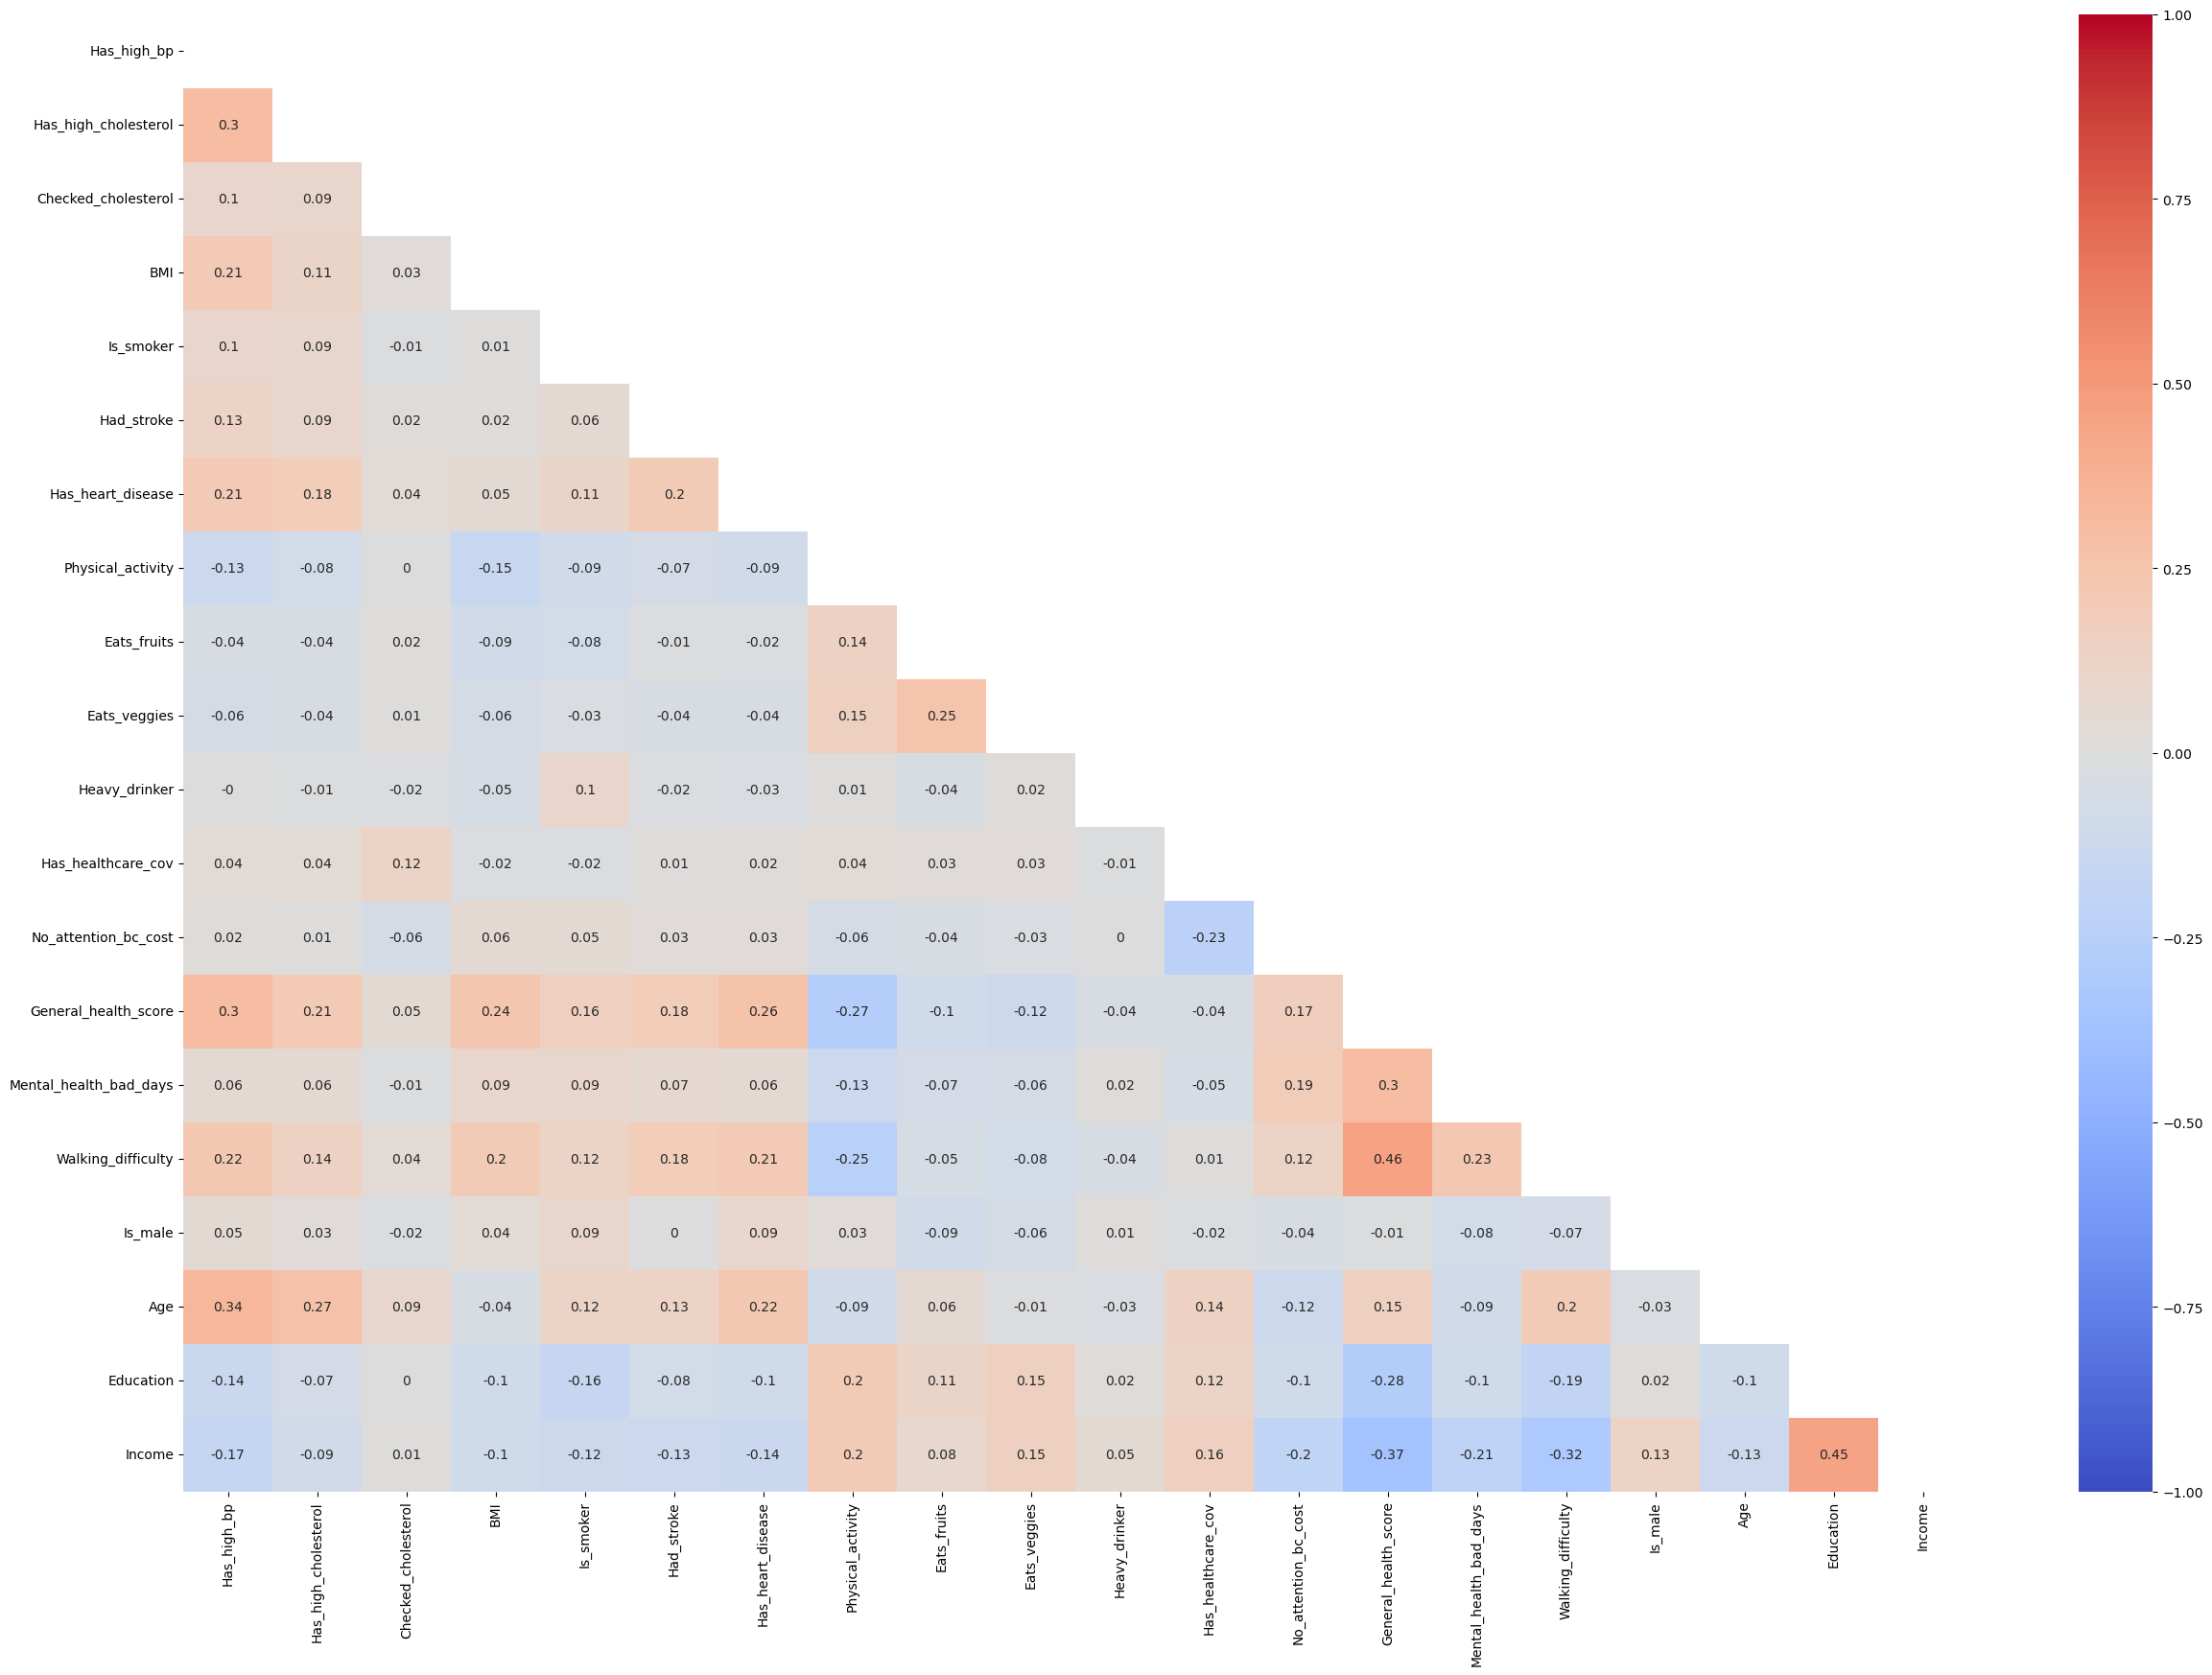

In [22]:
# calculate all the correlations between each independent variable

def plot_corr_heatmap(X):
    corr_df = X.corr()

    # mask for upper-triangle
    mask = np.triu(corr_df)

    # vaisualise heatmap
    plt.figure(figsize=(30, 20))
    sns.heatmap(corr_df.round(2),
                annot=True,
                center=0,
                vmax=1,
                vmin=-1,
                mask=mask,
                cmap='coolwarm')
    plt.show()

plot_corr_heatmap(X)

Looking at the above heatmap, we can tell that Physical_health_bad_days has a strong correlation with General_health_score. Therefore, it will be dropped.

In [20]:
df_preprocessed = df_preprocessed.drop('Physical_health_bad_days', axis=1)

In [23]:
df_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 21 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Has_diabetes            253680 non-null  int64  
 1   Has_high_bp             253680 non-null  float64
 2   Has_high_cholesterol    253680 non-null  float64
 3   Checked_cholesterol     253680 non-null  float64
 4   BMI                     253680 non-null  float64
 5   Is_smoker               253680 non-null  float64
 6   Had_stroke              253680 non-null  float64
 7   Has_heart_disease       253680 non-null  float64
 8   Physical_activity       253680 non-null  float64
 9   Eats_fruits             253680 non-null  float64
 10  Eats_veggies            253680 non-null  float64
 11  Heavy_drinker           253680 non-null  float64
 12  Has_healthcare_cov      253680 non-null  float64
 13  No_attention_bc_cost    253680 non-null  float64
 14  General_health_score

In [24]:
# Save dataframe
df_preprocessed.to_csv("../Data/Preprocessed_data/Diabetes_Health_Indicators_Preprocessed.csv", index=False)

### 2.5 Remainder/test split

In [25]:
# Set up X (i.e., independent variables; features) and y (i.e., dependent variable; target)
X = df_preprocessed.drop('Has_diabetes', axis=1)
y = df_preprocessed['Has_diabetes']

# Print shapes
print('Shape of X:', X.shape)
print('Shape of y:', y.shape)

Shape of X: (253680, 20)
Shape of y: (253680,)


In [26]:
# Before splitting dataset, create a list of the indices of the columns that are not categorical (BMI and Mental_health_bad_days ) as these would be needed to do oversampling later
numerical_indices = [X.columns.tolist().index('BMI'), X.columns.tolist().index('Mental_health_bad_days')]
all_indices = set(range(X.shape[1]))
categorical_indices = list(all_indices - set(numerical_indices))
print(numerical_indices)
print(all_indices)
print(categorical_indices)

[3, 14]
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19}
[0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19]


In [27]:
# Split the data into remainder and test sets
X_rem, X_test, y_rem, y_test = train_test_split(X, y, test_size=0.3, random_state=22, stratify=y)

# Print info on how the data has been split
print(f'The remainder set has {len(X_rem)} data points.')
print(f'The test set has {len(X_test)} data points.')


The remainder set has 177576 data points.
The test set has 76104 data points.


### 2.6 Oversampling

Oversampling will be performed on the training set. After the reviewing the following documentation, it was decided to use SMOTE-NC which can be used for datasets containing both numerical and categorical features which is the case of the dataset used in this project.
- https://imbalanced-learn.org/stable/over_sampling.html
- https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTENC.html#imblearn.over_sampling.SMOTENC




In [30]:
#Initialise SMOTENC, using the list of indices of categorical features previously created. The random_state attribute is added so that the same results can be reproduced later
smote_nc = SMOTENC(categorical_features=categorical_indices, random_state=42)

In [31]:
#Fit and apply SMOTE-NC on the remainder data
X_rem_oversampled, y_rem_oversampled = smote_nc.fit_resample(X_rem, y_rem)

# Print info on the newly crated data
print(f'The X_rem_oversampled data has {len(X_rem_oversampled)} rows.')
print(f'The y_rem_oversampled set has {len(y_rem_oversampled)} rows.')


The X_rem_oversampled data has 299184 rows.
The y_rem_oversampled set has 299184 rows.


In [32]:
# Confirm data is balanced
Has_diabetes_counts = y_rem_oversampled.value_counts()
Has_diabetes_counts

Has_diabetes
0    149592
1    149592
Name: count, dtype: int64

In [33]:
df_cleaned.to_csv("../data/Preprocessed_data/Diabetes_Health_Indicators_Cleaned_.csv", index=False)

In [34]:
# Save data after oversampling
X_rem.to_pickle("../data/Preprocessed_data/X_rem.pkl")
y_rem.to_pickle("../data/Preprocessed_data/y_rem.pkl")
X_rem_oversampled.to_pickle("../data/Preprocessed_data/X_rem_oversampled.pkl")
y_rem_oversampled.to_pickle("../data/Preprocessed_data/y_rem_oversampled.pkl")
X_test.to_pickle("../data/Preprocessed_data/X_test.pkl")
y_test.to_pickle("../data/Preprocessed_data/y_test.pkl")


### 2.7 Scaling
As seen below, only columns BMI and Mental_health_bad_days need to be scaled

In [35]:
# Create new variables by copying X_rem_oversampled and X_test
X_rem_oversampled_scaled = X_rem_oversampled.copy()
X_test_scaled = X_test.copy()

In [36]:
X_rem_oversampled_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
Has_high_bp,299184.0,0.565969,0.495630,0.0,0.0,1.000000,1.0,1.0
Has_high_cholesterol,299184.0,0.529129,0.499152,0.0,0.0,1.000000,1.0,1.0
Checked_cholesterol,299184.0,0.977810,0.147302,0.0,1.0,1.000000,1.0,1.0
BMI,299184.0,29.794884,7.021726,12.0,25.0,28.648114,33.0,98.0
Is_smoker,299184.0,0.474006,0.499325,0.0,0.0,0.000000,1.0,1.0
Had_stroke,299184.0,0.043752,0.204544,0.0,0.0,0.000000,0.0,1.0
Has_heart_disease,299184.0,0.131438,0.337879,0.0,0.0,0.000000,0.0,1.0
Physical_activity,299184.0,0.712398,0.452645,0.0,0.0,1.000000,1.0,1.0
Eats_fruits,299184.0,0.617078,0.486100,0.0,0.0,1.000000,1.0,1.0
Eats_veggies,299184.0,0.800494,0.399630,0.0,1.0,1.000000,1.0,1.0


In [37]:
# List columns that need scaling
columns_to_scale = ['BMI', 'Mental_health_bad_days']
scaler = StandardScaler()

# print(columns_to_scale)

In [38]:
# Fit the scaler on the X_rem dataset, but only using the columns_to_scale
scaler.fit(X_rem_oversampled_scaled[columns_to_scale])

StandardScaler()

In [39]:
# Transform both datasets
X_rem_oversampled_scaled[columns_to_scale] = scaler.fit_transform(X_rem_oversampled_scaled[columns_to_scale])
X_test_scaled[columns_to_scale] = scaler.fit_transform(X_test_scaled[columns_to_scale])

In [40]:
#Confirm scaling has been done correctly
X_rem_oversampled_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
Has_high_bp,299184.0,5.659694e-01,0.495630,0.000000,0.000000,1.000000,1.000000,1.000000
Has_high_cholesterol,299184.0,5.291292e-01,0.499152,0.000000,0.000000,1.000000,1.000000,1.000000
Checked_cholesterol,299184.0,9.778096e-01,0.147302,0.000000,1.000000,1.000000,1.000000,1.000000
BMI,299184.0,-4.628275e-16,1.000002,-2.534265,-0.682865,-0.163318,0.456458,9.713456
Is_smoker,299184.0,4.740060e-01,0.499325,0.000000,0.000000,0.000000,1.000000,1.000000
Had_stroke,299184.0,4.375234e-02,0.204544,0.000000,0.000000,0.000000,0.000000,1.000000
Has_heart_disease,299184.0,1.314375e-01,0.337879,0.000000,0.000000,0.000000,0.000000,1.000000
Physical_activity,299184.0,7.123977e-01,0.452645,0.000000,0.000000,1.000000,1.000000,1.000000
Eats_fruits,299184.0,6.170785e-01,0.486100,0.000000,0.000000,1.000000,1.000000,1.000000
Eats_veggies,299184.0,8.004940e-01,0.399630,0.000000,1.000000,1.000000,1.000000,1.000000


In [41]:
# Save data after scaling
X_rem_oversampled_scaled.to_pickle("../data/Preprocessed_data/X_rem_oversampled_scaled.pkl")
X_test_scaled.to_pickle("../data/Preprocessed_data/X_test_scaled.pkl")